### Lab 3

Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Importing the dataset

In [2]:
df = pd.read_csv('Steel_industry_data.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


Statistical analysis of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                                   35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [4]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


Checking non-unique values in the columns

In [5]:
for col in df.columns:
    print(f'{col}: {str(df[col].nunique())}')

date: 35040
Usage_kWh: 3343
Lagging_Current_Reactive_Power_kVarh: 1954
Leading_Current_Reactive_Power_kVarh: 768
CO2: 8
Lagging_Current_Power_Factor: 5079
Leading_Current_Power_Factor: 3366
NSM: 96
WeekStatus: 2
Day_of_week: 7
Load_Type: 3


Creating a standardized form of the data

In [6]:
from scipy import stats
#standardizing
review = pd.DataFrame(df)
review
review['Usage_kWh']=stats.zscore(review['Usage_kWh'])
review['Lagging_Current_Reactive_Power_kVarh']=stats.zscore(review['Lagging_Current_Reactive_Power_kVarh'])
review['Leading_Current_Reactive_Power_kVarh']=stats.zscore(review['Leading_Current_Reactive_Power_kVarh'])
review['CO2']=stats.zscore(review['CO2'])
review['Lagging_Current_Power_Factor']=stats.zscore(review['Lagging_Current_Power_Factor'])
review['Leading_Current_Power_Factor']=stats.zscore(review['Leading_Current_Power_Factor'])
review['NSM']=stats.zscore(review['NSM'])
review.to_csv('standared.csv',index=False)

review.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,-0.724105,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,Weekday,Monday,Light_Load
1,01/01/2018 00:30,-0.699287,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,Weekday,Monday,Light_Load
2,01/01/2018 00:45,-0.722012,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,Weekday,Monday,Light_Load
3,01/01/2018 01:00,-0.719919,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756,Weekday,Monday,Light_Load
4,01/01/2018 01:15,-0.704669,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.533670,Weekday,Monday,Light_Load


In [7]:
df = pd.read_csv('standared.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,-0.724105,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,Weekday,Monday,Light_Load
1,01/01/2018 00:30,-0.699287,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,Weekday,Monday,Light_Load
2,01/01/2018 00:45,-0.722012,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,Weekday,Monday,Light_Load
3,01/01/2018 01:00,-0.719919,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756,Weekday,Monday,Light_Load
4,01/01/2018 01:15,-0.704669,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.533670,Weekday,Monday,Light_Load


Encoding non numeric values into numeric

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(df['WeekStatus'])
df.drop("WeekStatus",axis=1,inplace=True)
df["WeekStatus"]=label
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,Load_Type,WeekStatus
0,01/01/2018 00:15,-0.724105,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,Monday,Light_Load,0
1,01/01/2018 00:30,-0.699287,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,Monday,Light_Load,0
2,01/01/2018 00:45,-0.722012,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,Monday,Light_Load,0
3,01/01/2018 01:00,-0.719919,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756,Monday,Light_Load,0
4,01/01/2018 01:15,-0.704669,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.533670,Monday,Light_Load,0


In [9]:
one_hot = pd.get_dummies(df['Day_of_week'])
df = df.drop('Day_of_week',axis = 1)
df = df.join(one_hot)
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,WeekStatus,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,01/01/2018 00:15,-0.724105,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,Light_Load,0,False,True,False,False,False,False,False
1,01/01/2018 00:30,-0.699287,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,Light_Load,0,False,True,False,False,False,False,False
2,01/01/2018 00:45,-0.722012,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,Light_Load,0,False,True,False,False,False,False,False
3,01/01/2018 01:00,-0.719919,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756,Light_Load,0,False,True,False,False,False,False,False
4,01/01/2018 01:15,-0.704669,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.533670,Light_Load,0,False,True,False,False,False,False,False


One hot encoding Lord_Type

In [10]:
one_hot = pd.get_dummies(df['Load_Type'])
df = df.drop('Load_Type',axis = 1)
df = df.join(one_hot)
df.head()
#transform with one_hot for load_type

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Load,Maximum_Load,Medium_Load
0,01/01/2018 00:15,-0.724105,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,0,False,True,False,False,False,False,False,True,False,False
1,01/01/2018 00:30,-0.699287,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,0,False,True,False,False,False,False,False,True,False,False
2,01/01/2018 00:45,-0.722012,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,0,False,True,False,False,False,False,False,True,False,False
3,01/01/2018 01:00,-0.719919,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756,0,False,True,False,False,False,False,False,True,False,False
4,01/01/2018 01:15,-0.704669,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.533670,0,False,True,False,False,False,False,False,True,False,False


In [11]:
le = LabelEncoder()
for col in ['Friday','Monday','Tuesday','Saturday','Sunday','Thursday','Wednesday','Light_Load','Maximum_Load','Medium_Load']:
    df[col] = le.fit_transform(df[col])

df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Load,Maximum_Load,Medium_Load
0,01/01/2018 00:15,-0.724105,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,0,0,1,0,0,0,0,0,1,0,0
1,01/01/2018 00:30,-0.699287,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,0,0,1,0,0,0,0,0,1,0,0
2,01/01/2018 00:45,-0.722012,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,0,0,1,0,0,0,0,0,1,0,0
3,01/01/2018 01:00,-0.719919,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756,0,0,1,0,0,0,0,0,1,0,0
4,01/01/2018 01:15,-0.704669,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.533670,0,0,1,0,0,0,0,0,1,0,0


In [12]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Load,Maximum_Load,Medium_Load
0,01/01/2018 00:15,-0.724105,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,0,0,1,0,0,0,0,0,1,0,0
1,01/01/2018 00:30,-0.699287,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,0,0,1,0,0,0,0,0,1,0,0
2,01/01/2018 00:45,-0.722012,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,0,0,1,0,0,0,0,0,1,0,0
3,01/01/2018 01:00,-0.719919,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756,0,0,1,0,0,0,0,0,1,0,0
4,01/01/2018 01:15,-0.704669,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.533670,0,0,1,0,0,0,0,0,1,0,0


In [13]:
df = df.drop(columns=['date'], axis=0)

Exporting transformed form of the dataset for later use

In [14]:
df.to_csv('transformed.csv')

Descriptive statistics of the dataset

In [15]:
def descriptive_stats(df):
    #adding additional statsical parameters to check our data
    C = len(df.columns)
    L = len(df.index)
    CN = df.count()
    NP = ((L-CN)/L)*100
    MN = df.min()
    Q1 = df.quantile(q=0.25)
    MA=df.mean() 
    ME=df.median() 
    Q3=df.quantile(q=0.75) 
    MX=df.max() 
    ST=df.std() 
    P=df.nunique() 
    IQ=Q3-Q1 

    frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
    frame=frame.T
    f=pd.DataFrame(frame)
    f.index=['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль','Среднее', 'Медиана', 'Третий квартиль', 'Максимум','Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    f1=f.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(["Мощность"], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:steelblue" if (i<30 and i>0) else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:limegreen" if i==0 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))
    return f,f1

f,f1 = descriptive_stats(df)
f1

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Load,Maximum_Load,Medium_Load
Количество,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
Процент пропусков,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Минимум,-0.818890,-0.799434,-0.521385,-0.713550,-4.258646,-2.770147,-1.714102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Первый квартиль,-0.723208,-0.658380,-0.521385,-0.713550,-0.912109,0.503417,-0.857051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Среднее,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.284932,0.142466,0.145205,0.142466,0.142466,0.142466,0.142466,0.142466,0.515753,0.207534,0.276712
Медиана,-0.682244,-0.492794,-0.521385,-0.713550,0.390144,0.513268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Третий квартиль,0.713153,0.589032,-0.239879,0.524795,0.974811,0.513268,0.857051,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
Максимум,3.880920,5.143862,3.217659,3.620656,1.026473,0.513268,1.714102,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Стандартное отклонение,1.000014,1.000014,1.000014,1.000014,1.000014,1.000014,1.000014,0.451388,0.349532,0.352313,0.349532,0.349532,0.349532,0.349532,0.349532,0.499759,0.405547,0.447379
Мощность,3343.000000,1954.000000,768.000000,8.000000,5079.000000,3366.000000,96.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


creting a correlation heatmap of the dataset

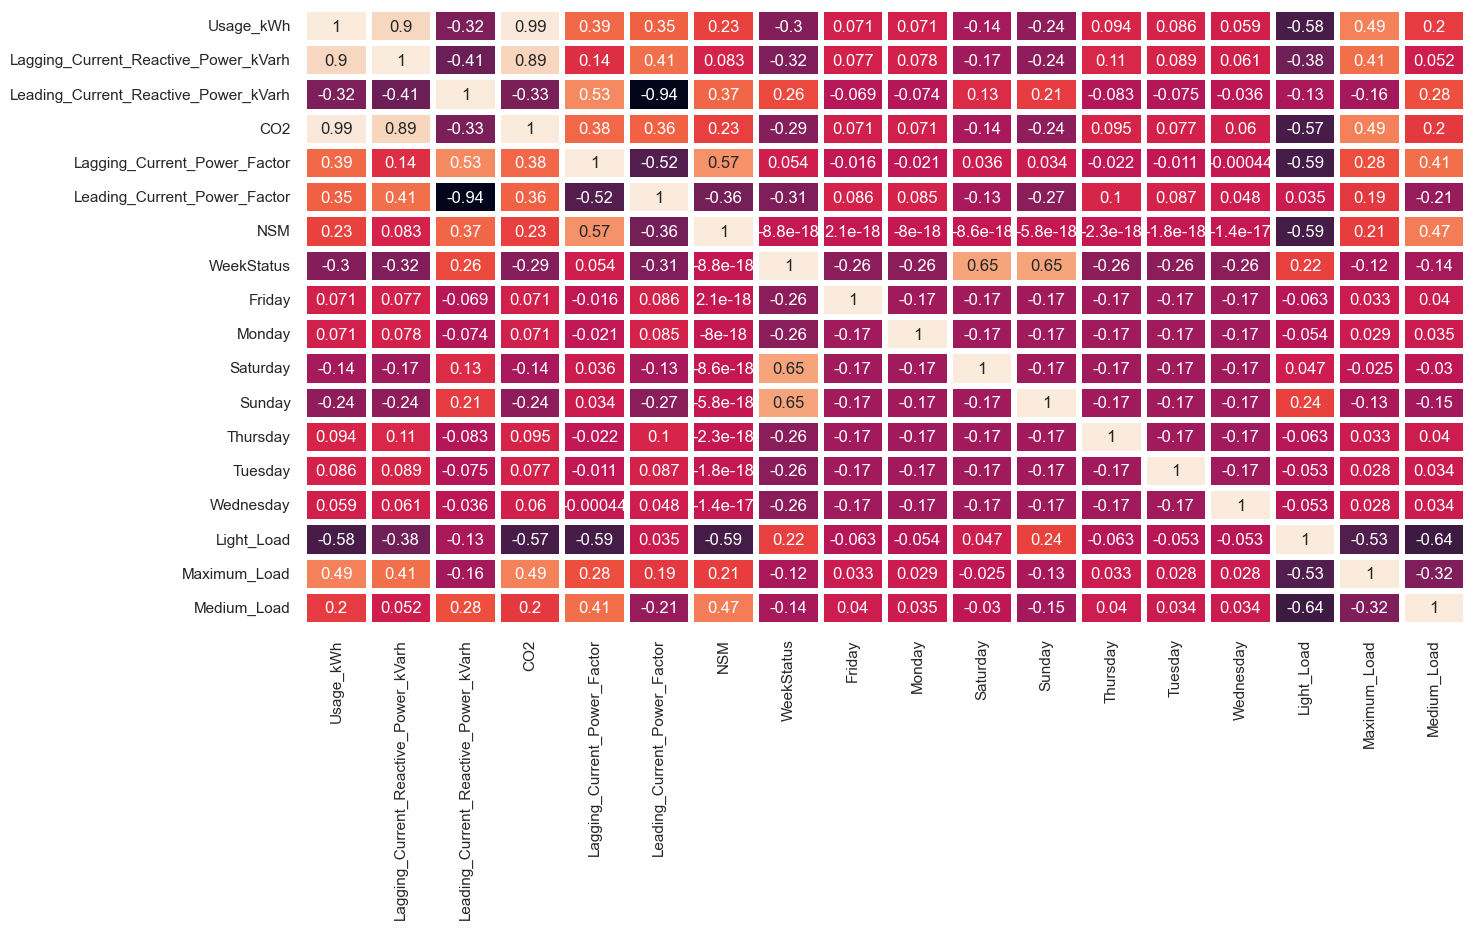

In [16]:
def make_heat_map(df):
    sns.set(rc={'figure.figsize': (15,8),})
    sns.heatmap(df.corr(), annot=True, linewidths=3, cbar=False)

make_heat_map(df)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2                                   35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  float64
 7   WeekStatus                            35040 non-null  int32  
 8   Friday                                35040 non-null  int64  
 9   Monday                                35040 non-null  int64  
 10  Saturday                              35040 non-null  int64  
 11  Sunday         

Feature importances

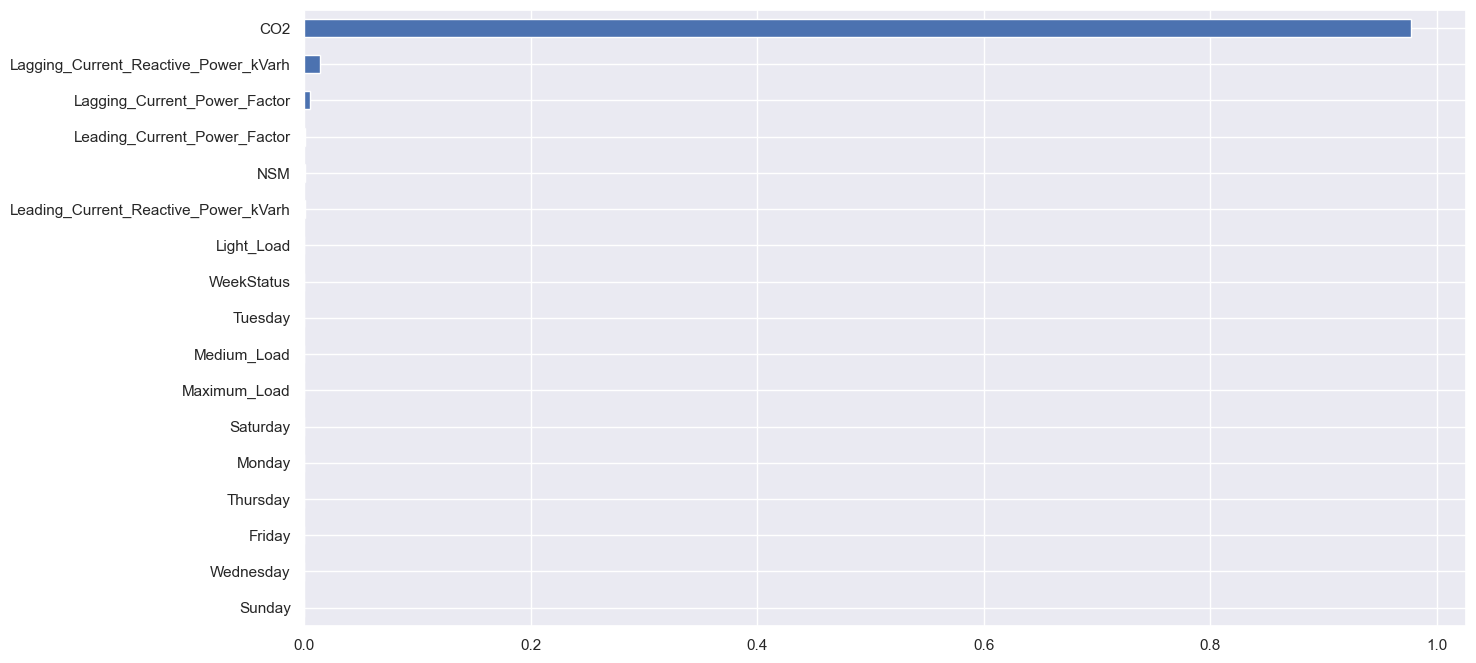

In [18]:
from sklearn.ensemble import RandomForestRegressor
def feature_importance(X, Y):

    regr = RandomForestRegressor(max_depth=20, random_state=42)
    regr.fit(X, Y)
    feat_importances = pd.Series(regr.feature_importances_, index=X.columns).sort_values(ascending=True)
    feat_importances.plot(kind='barh')

X=df.drop(columns=['Usage_kWh'],axis=1)
Y=df['Usage_kWh']

feature_importance(X, Y)

Histograms for distribution analysis

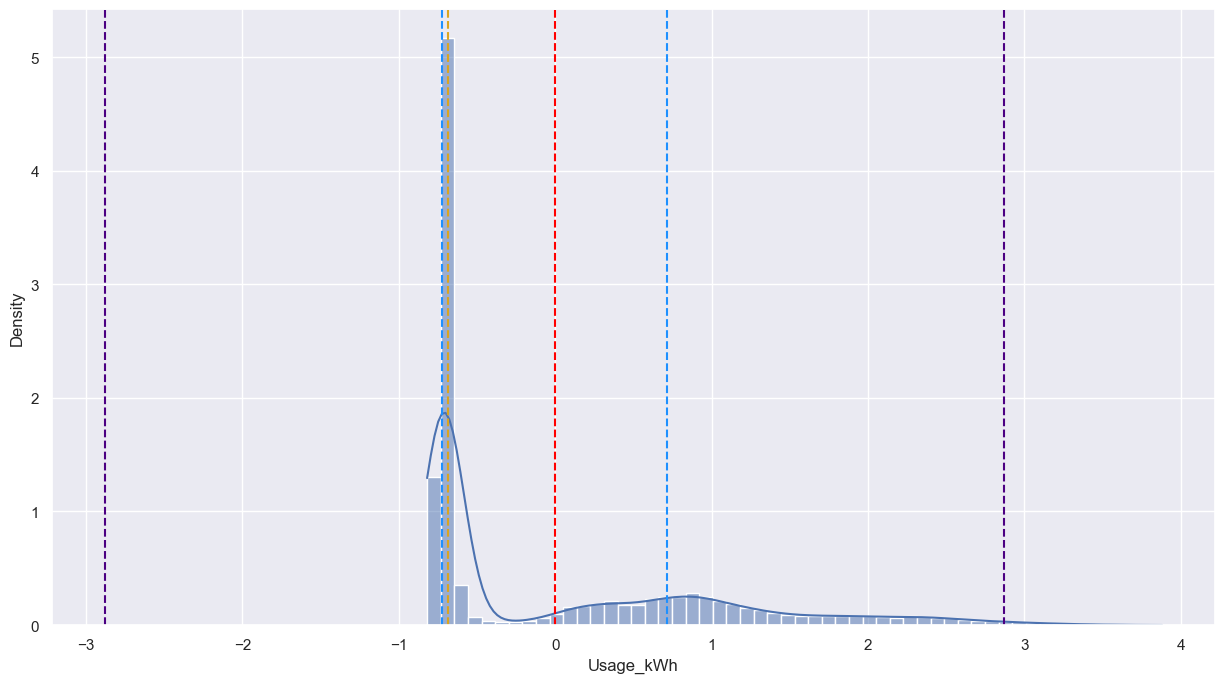

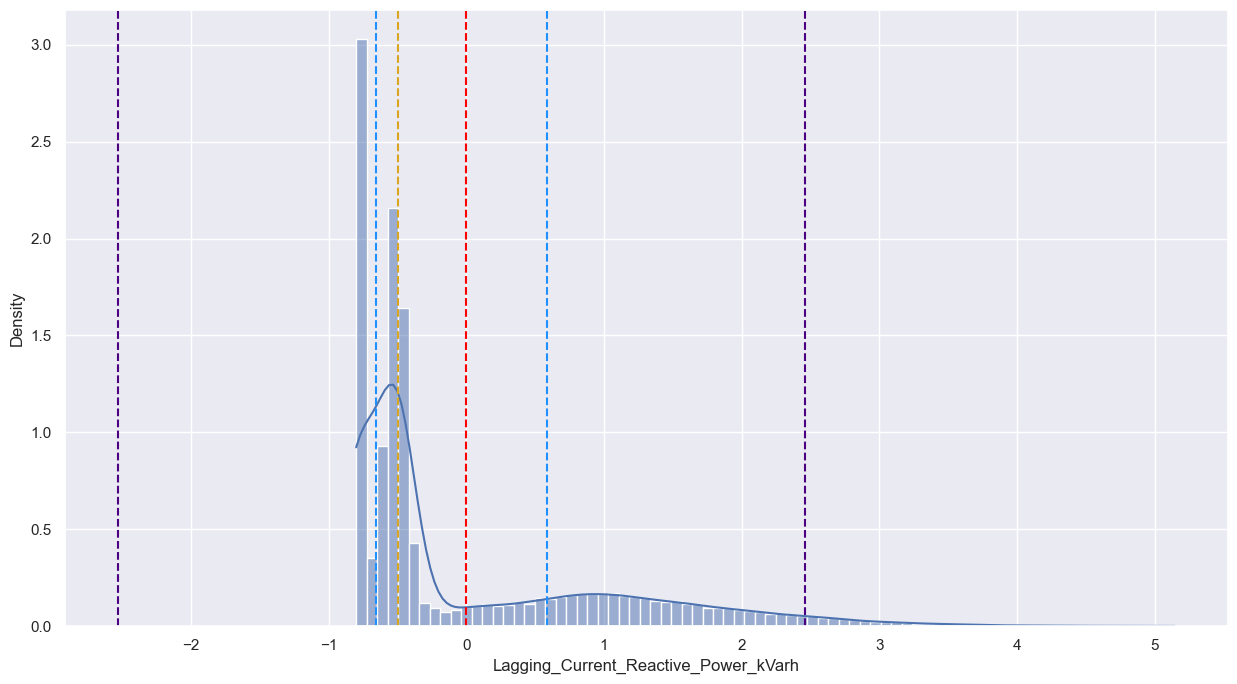

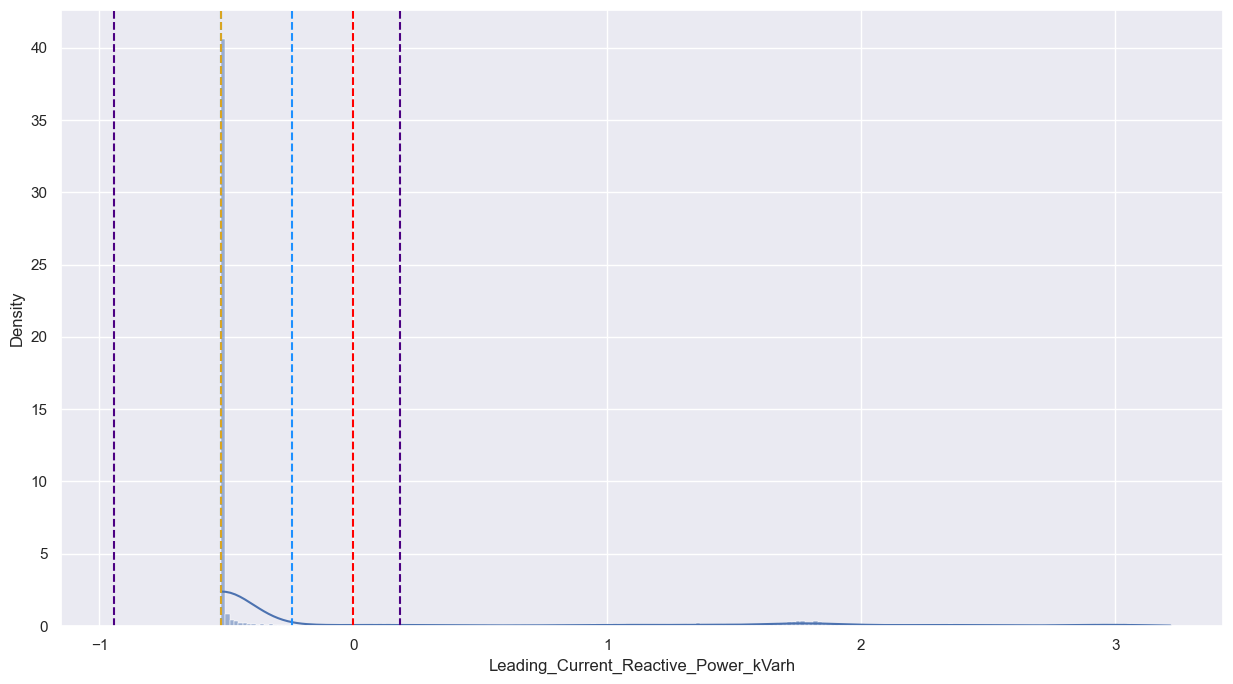

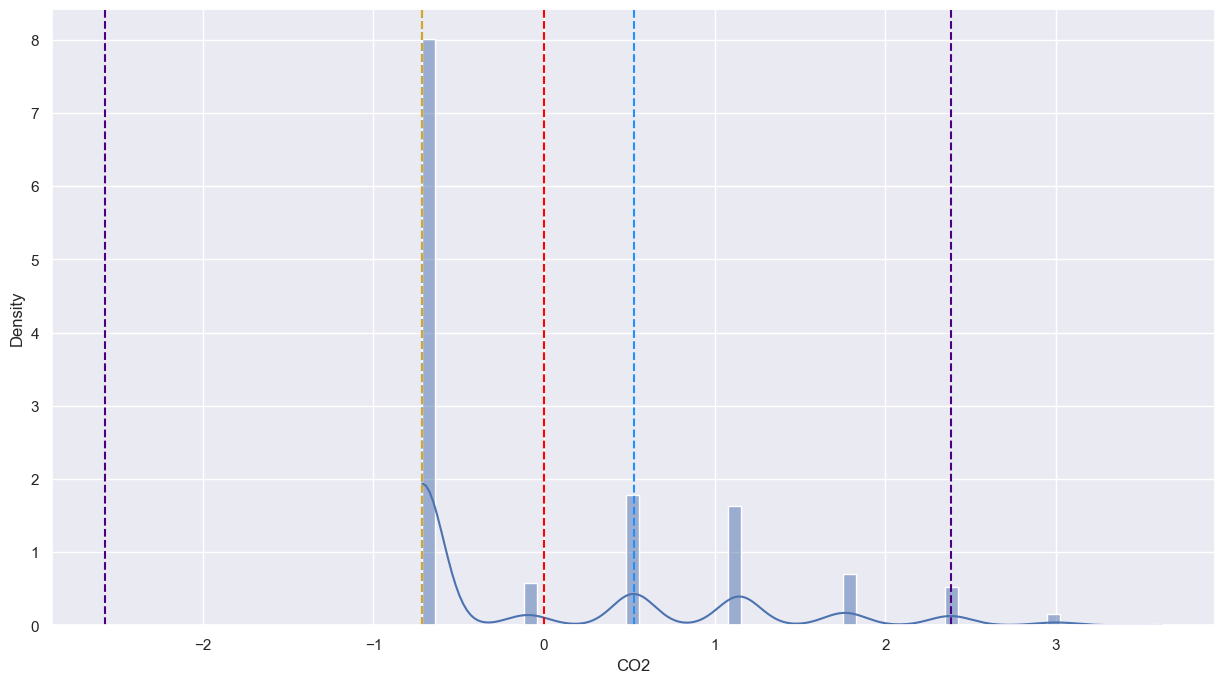

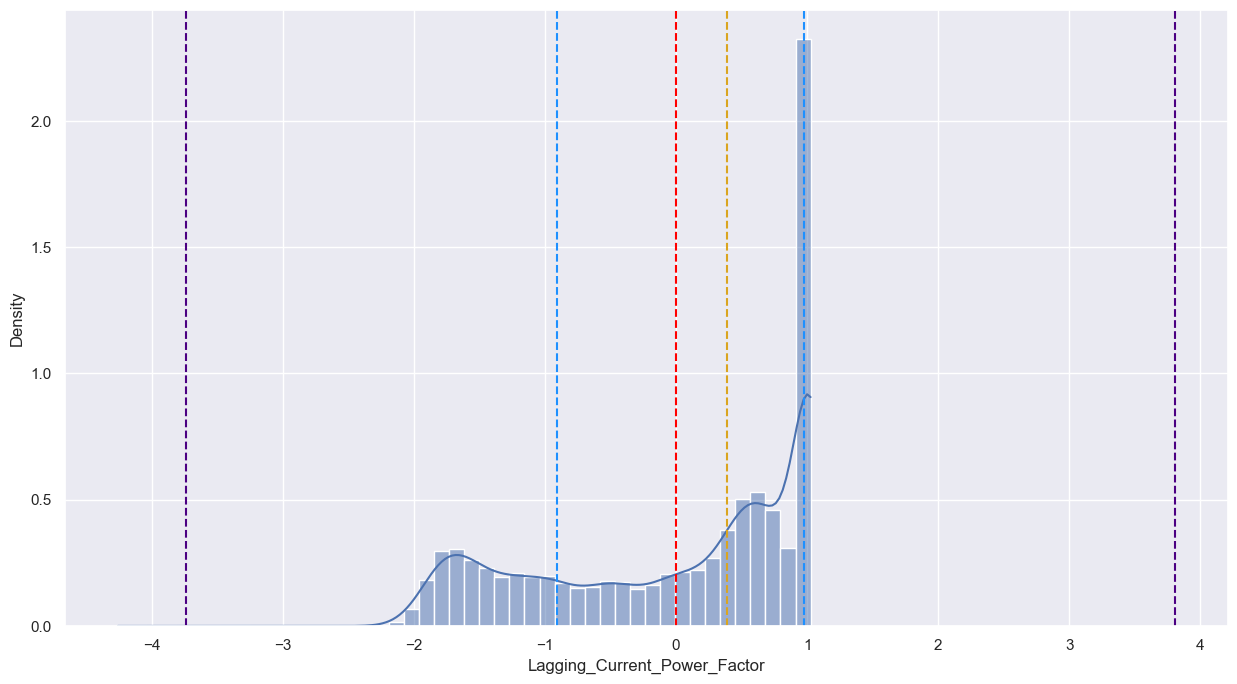

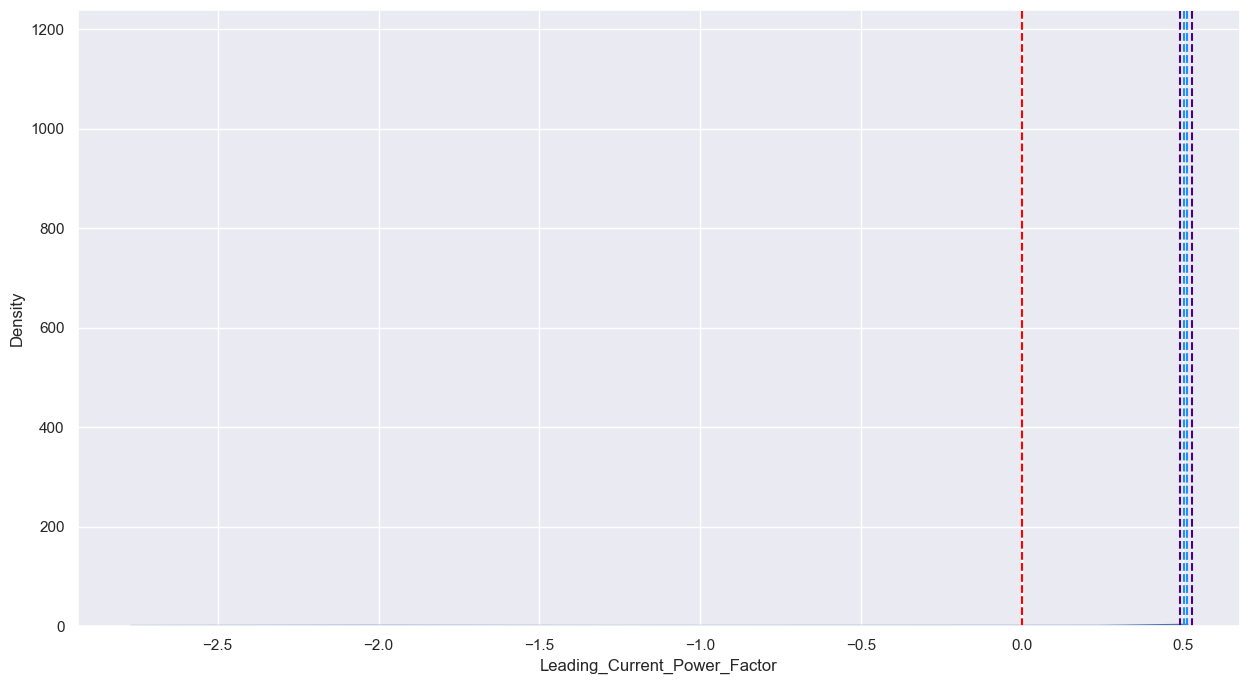

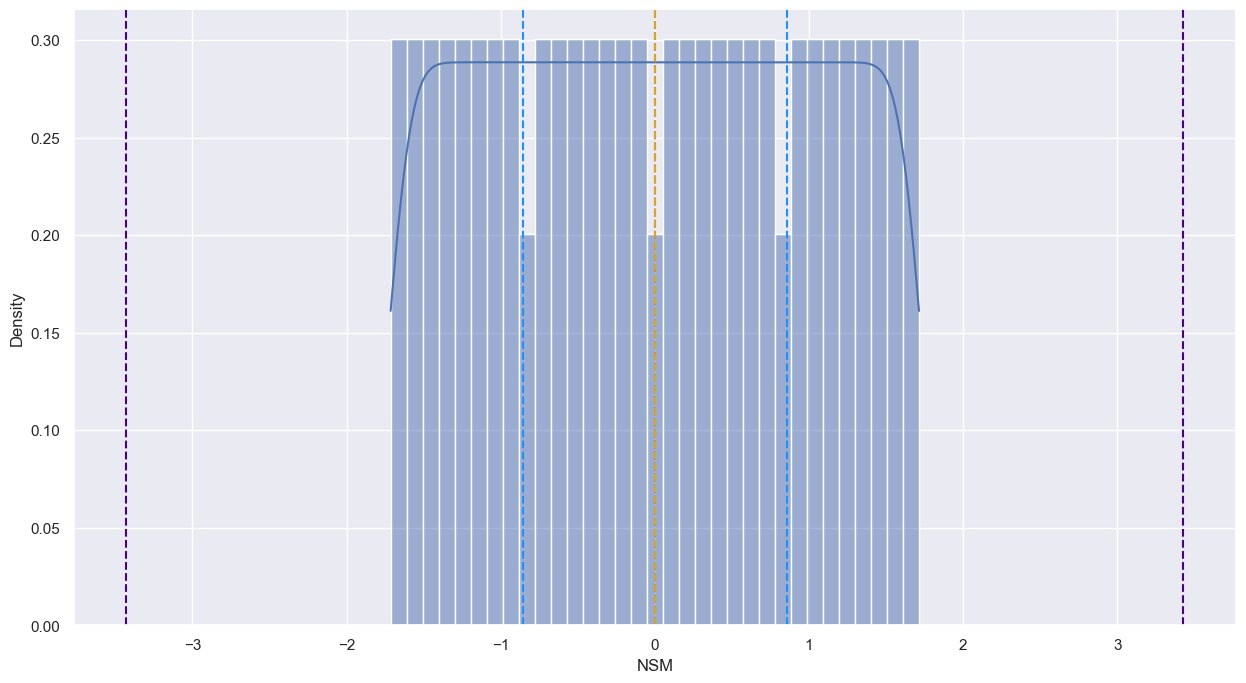

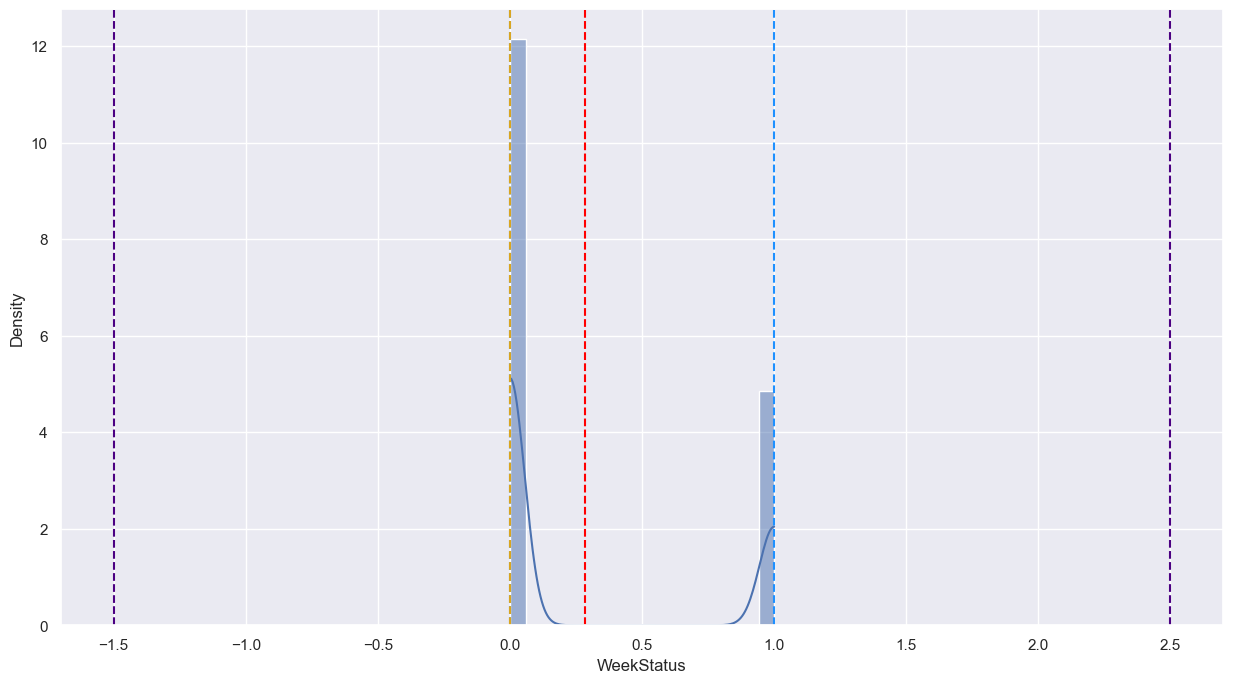

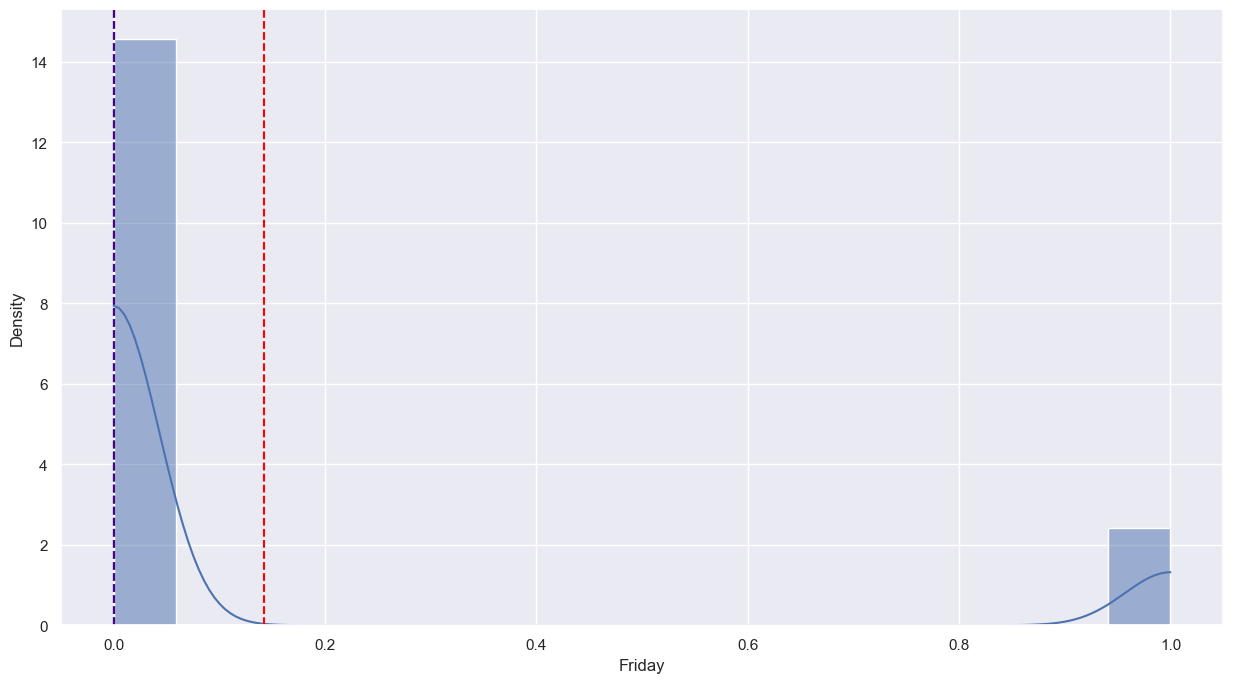

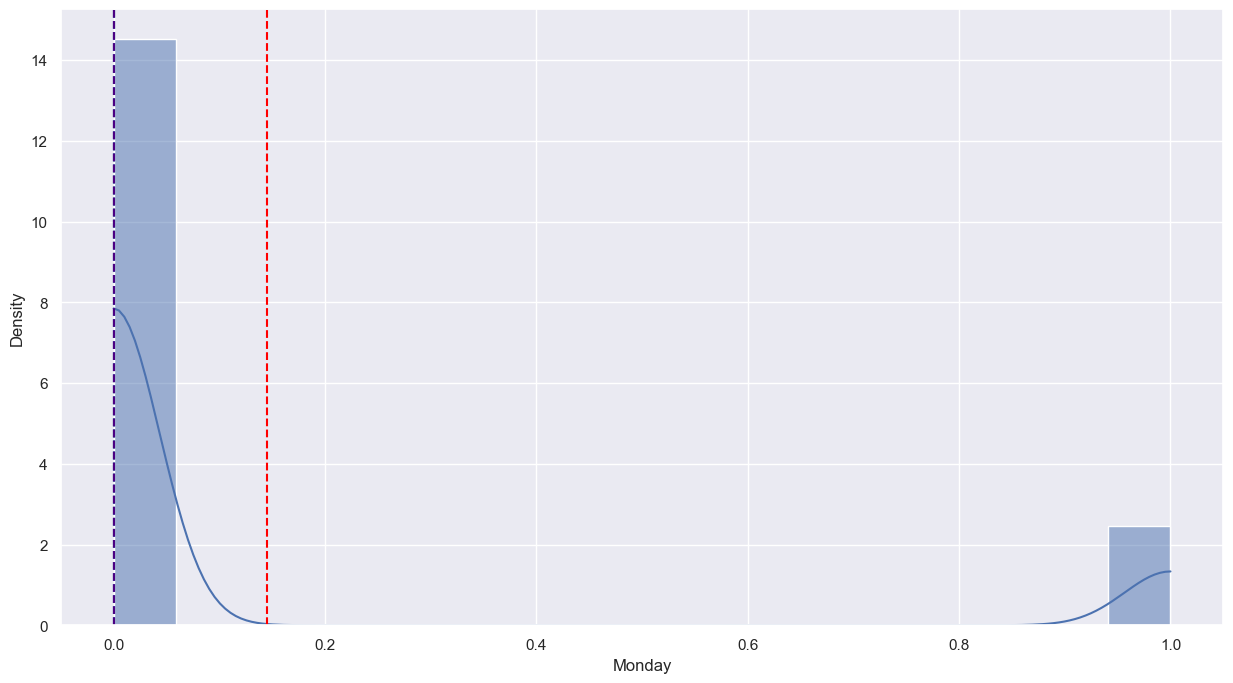

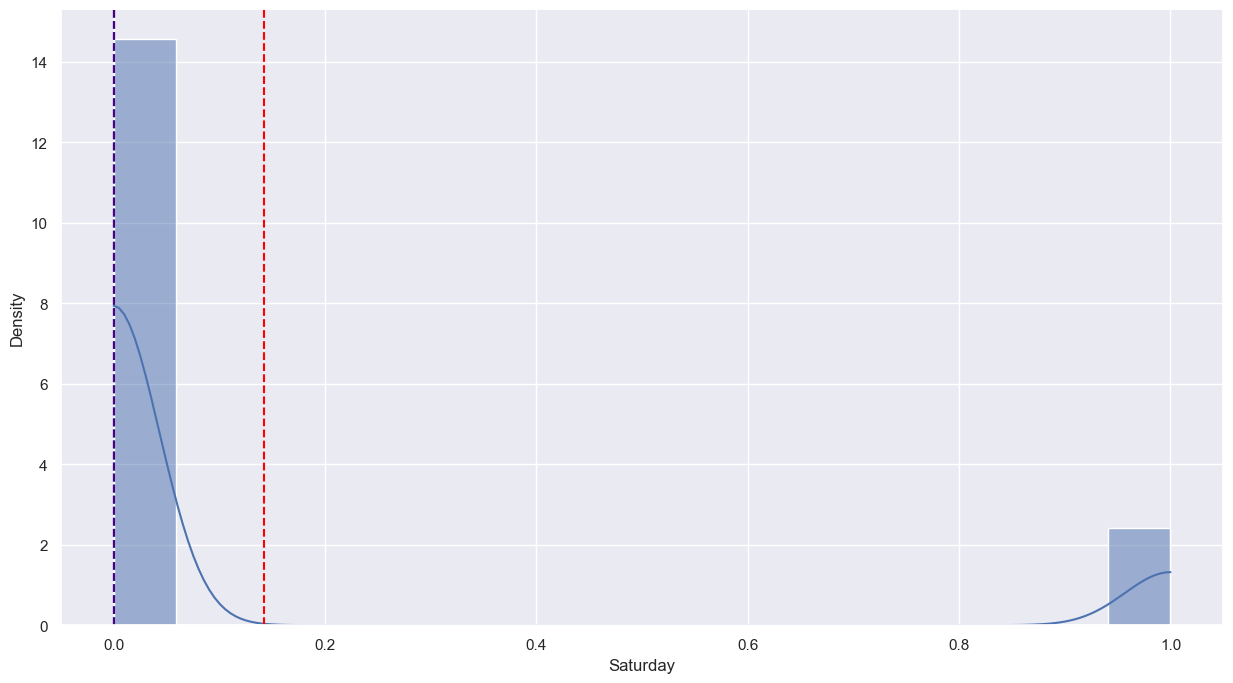

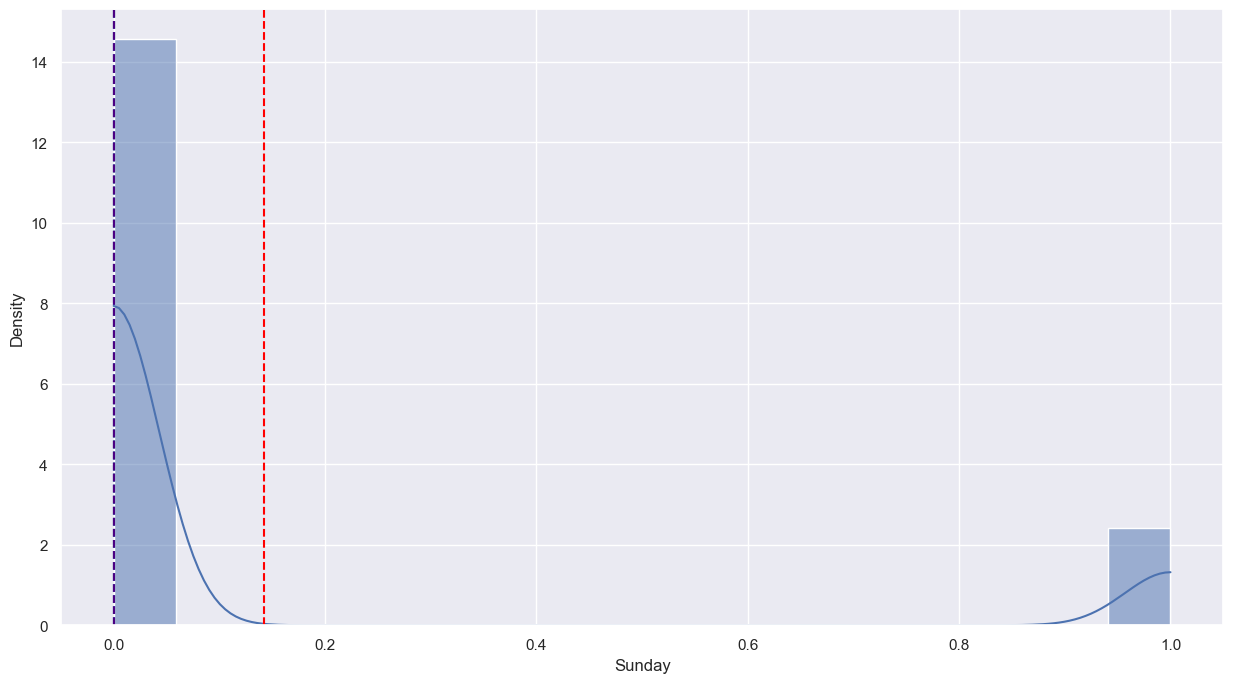

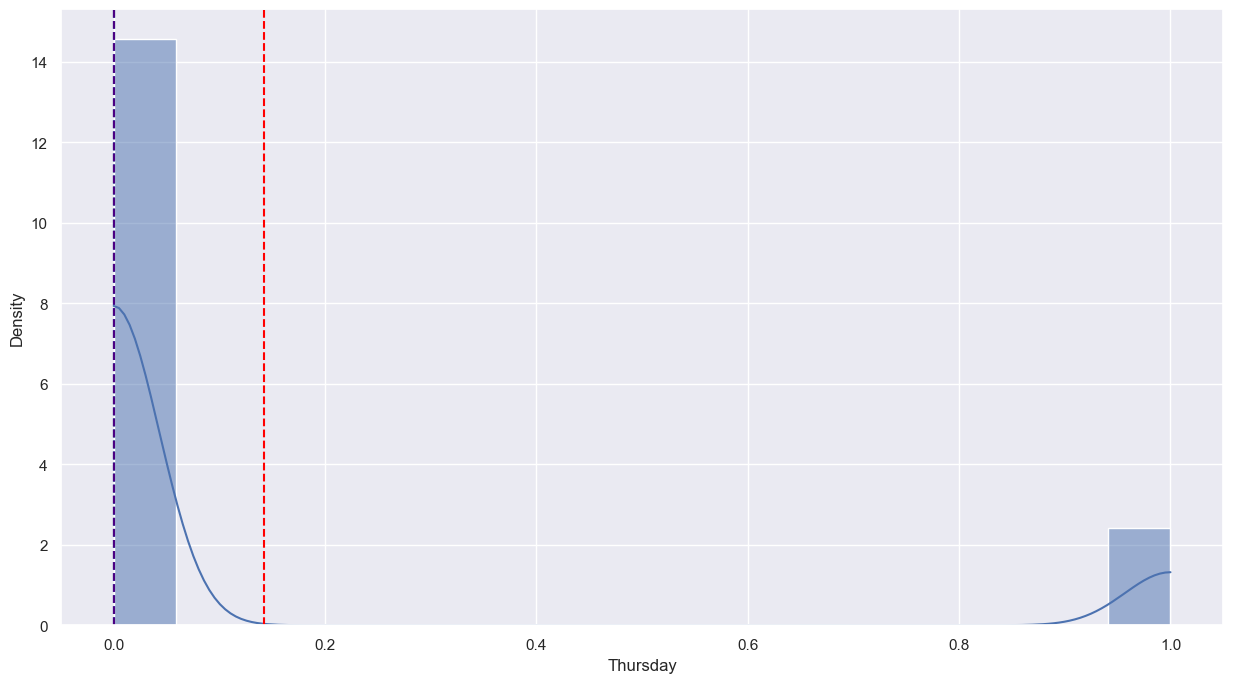

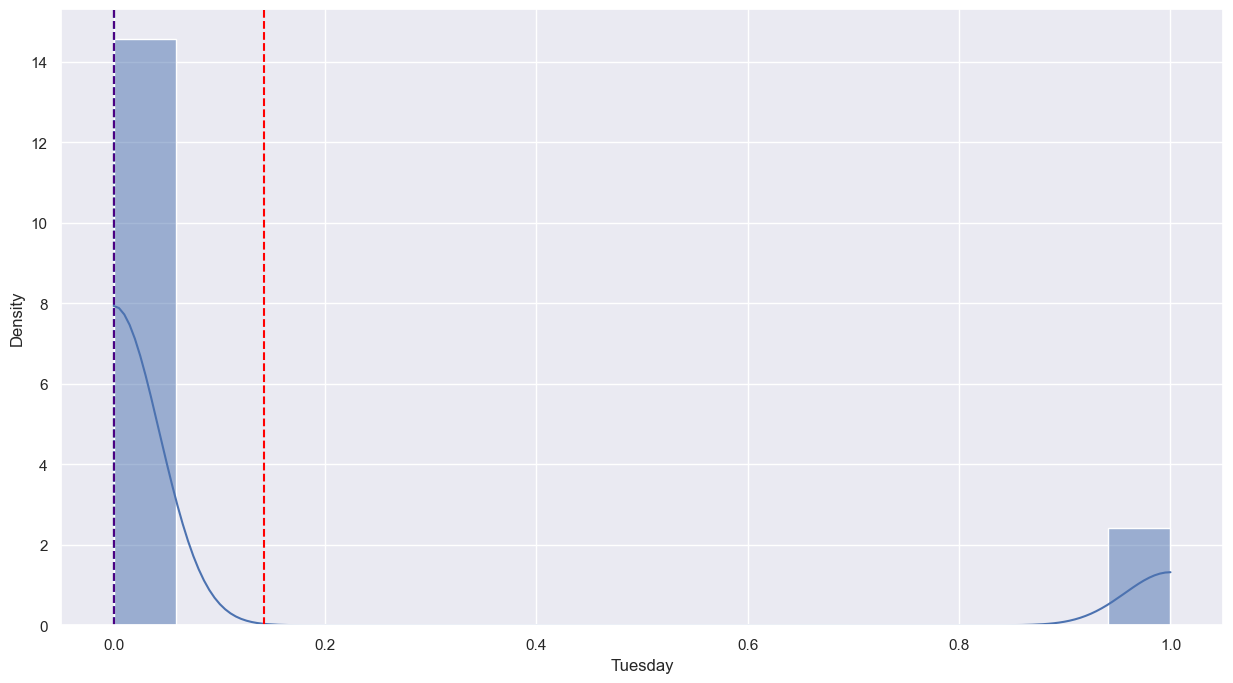

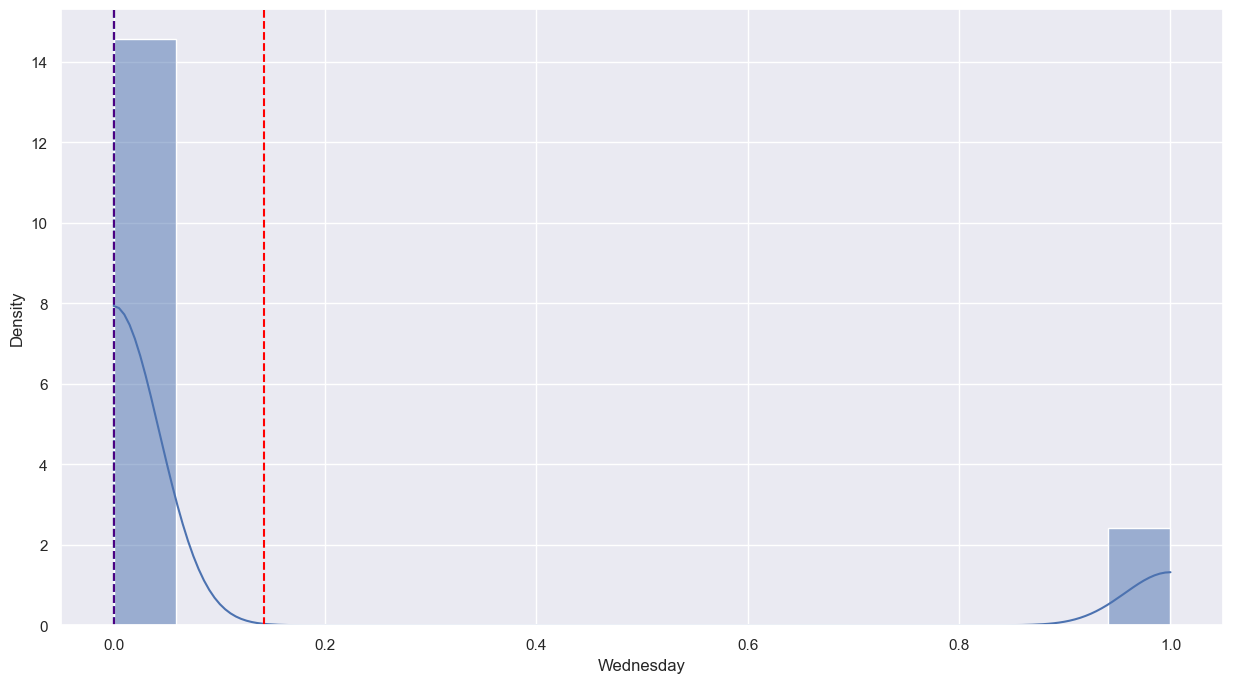

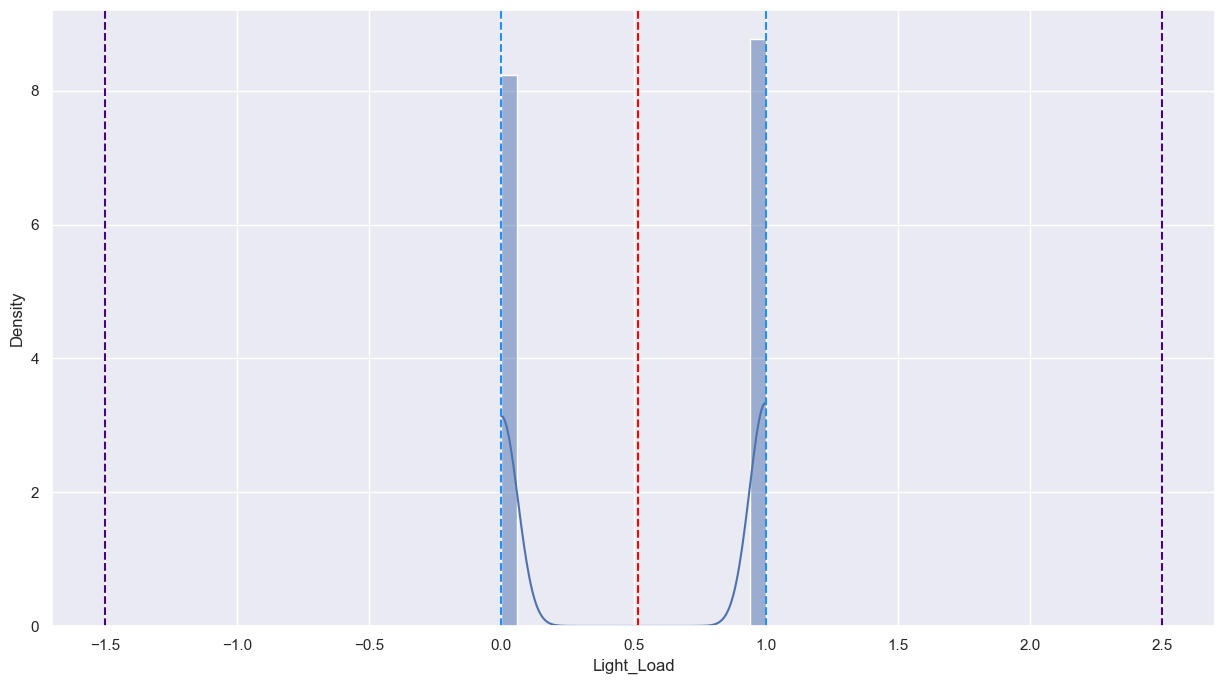

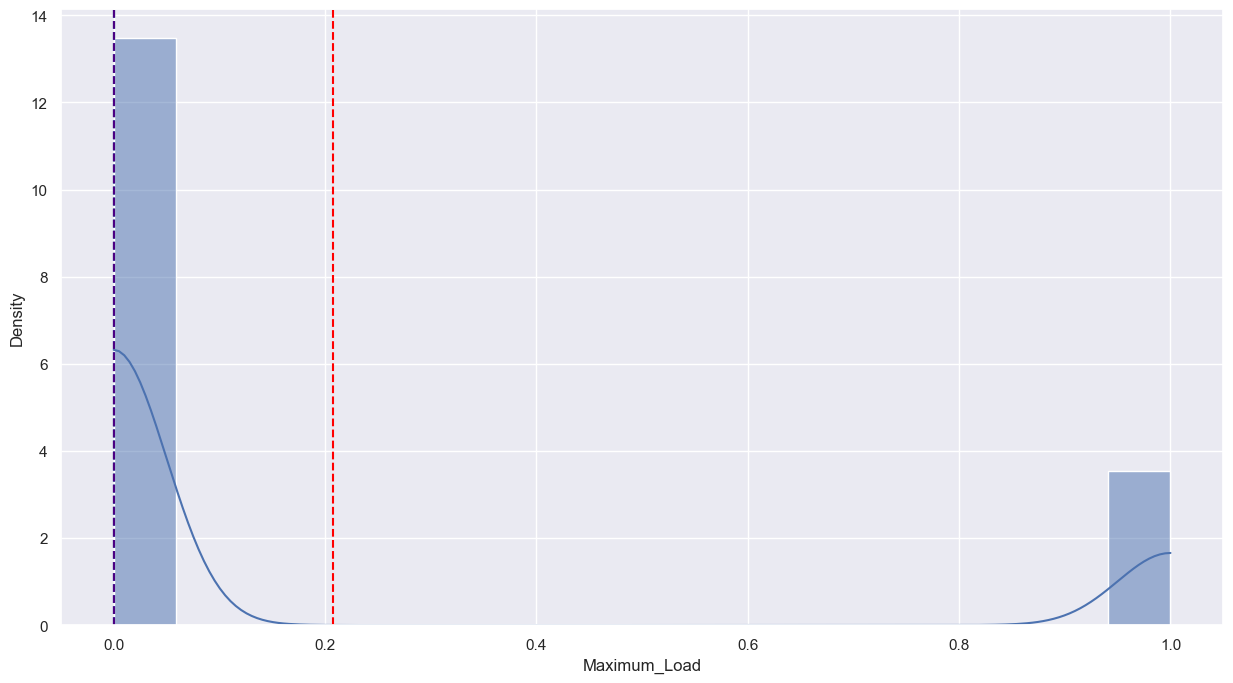

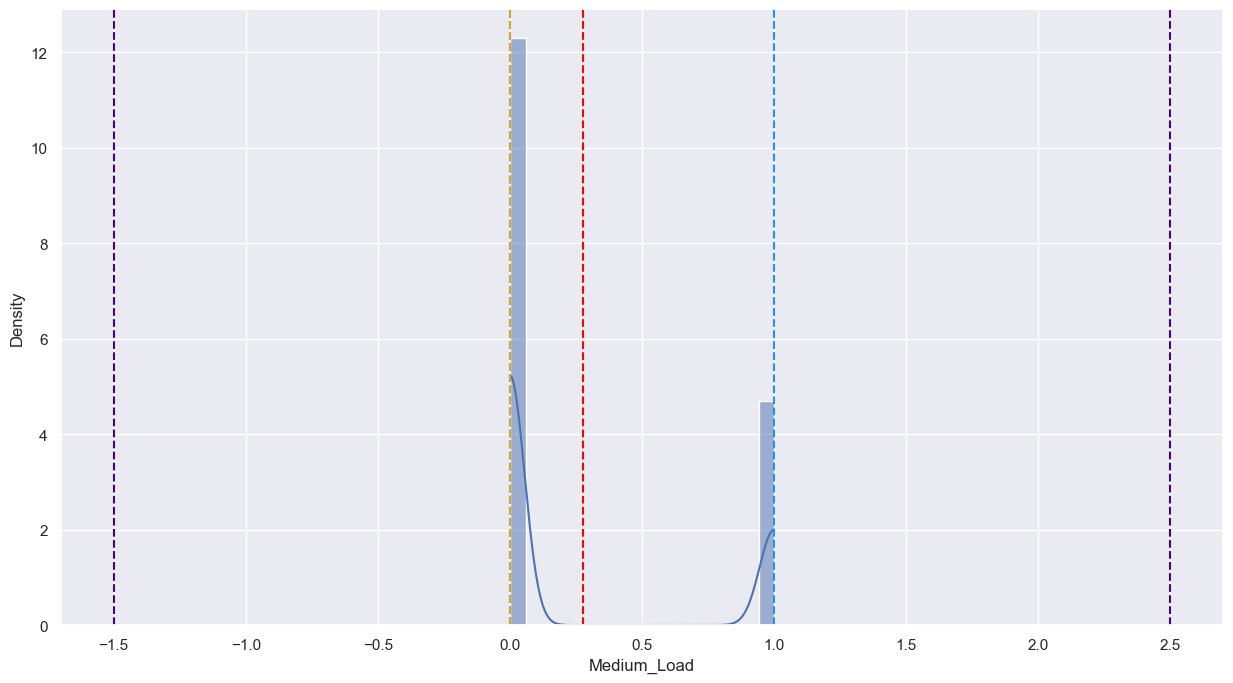

In [19]:
import matplotlib.pyplot as plt
for i in df.columns:
    plt.figure(i)
    sns.histplot(df[i],kde=True,stat="density")
    plt.axvline(f.iloc[3][i]-1.5*f.iloc[10][i], color="indigo", ls='--') #q1-1.5*iqr
    plt.axvline(f.iloc[3][i], color="dodgerblue", ls='--') #first quarile
    plt.axvline(f.iloc[4][i], color="red", ls='--') #mean
    plt.axvline(f.iloc[5][i], color="goldenrod", ls='--') #meadian
    plt.axvline(f.iloc[6][i], color="dodgerblue", ls='--') #third quatile
    plt.axvline(f.iloc[6][i]+1.5*f.iloc[10][i], color="indigo", ls='--') #q3+1.5*iqr
    plt.show()

a function for calculating R^2

In [20]:
def R_square(y_pred, y):
  y_mean = np.mean(y)
  return 1 - np.sum(np.square(y - y_pred))/np.sum(np.square(y - y_mean))

Splitting the dataset into train and validation sets. 70-30 split is used here.

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Select features and target
features = df.drop(columns=['Usage_kWh'])
target = df['Usage_kWh']

# Reshape for RNN input (samples, timesteps, features)
# Assuming each row is a single time step; adjust if you have sequences
X = features.values
y = target.values.reshape((-1,1))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_true = y_test



### Training RNN

In [22]:
from RNN import RNNTrainer
    
# Generate data
X = np.expand_dims(df.drop(columns=["Usage_kWh"]),axis=1).reshape(-1,1,17)
y = np.expand_dims(df["Usage_kWh"],axis=1).reshape(-1,1,1)

# Create large dataset
n_sequences = X.shape[0]
time_steps = 96
input_size = 17
hidden_size = 10
output_size = 1
batch_size = 32

# Split data
train_split = 0.7
val_split = 0.25
split1 = int(train_split * n_sequences)
split2 = int((train_split + val_split) * n_sequences)

X_train, X_val, X_test = X[:split1], X[split1:split2], X[split2:]
y_train, y_val, y_test = y[:split1], y[split1:split2], y[split2:]

# Initialize and train
trainer = RNNTrainer(input_size, hidden_size, output_size, batch_size)
trainer.train(
    X_train, y_train,
    epochs=50,
    batch_size=batch_size,
    X_val=X_val,
    y_val=y_val,
    shuffle=True
)

# Make predictions
predictions = trainer.predict(X_test, batch_size=batch_size)

Epoch 1/50
Train - MSE: 0.1482, RMSE: 0.3296, MAE: 0.2610
Val - MSE: 0.0262, RMSE: 0.1528, MAE: 0.1283
--------------------------------------------------
Epoch 2/50
Train - MSE: 0.0184, RMSE: 0.1273, MAE: 0.0904
Val - MSE: 0.0100, RMSE: 0.0927, MAE: 0.0734
--------------------------------------------------
Epoch 3/50
Train - MSE: 0.0124, RMSE: 0.1027, MAE: 0.0674
Val - MSE: 0.0079, RMSE: 0.0810, MAE: 0.0616
--------------------------------------------------
Epoch 4/50
Train - MSE: 0.0105, RMSE: 0.0950, MAE: 0.0607
Val - MSE: 0.0066, RMSE: 0.0722, MAE: 0.0536
--------------------------------------------------
Epoch 5/50
Train - MSE: 0.0091, RMSE: 0.0898, MAE: 0.0565
Val - MSE: 0.0052, RMSE: 0.0636, MAE: 0.0464
--------------------------------------------------
Epoch 6/50
Train - MSE: 0.0079, RMSE: 0.0846, MAE: 0.0523
Val - MSE: 0.0050, RMSE: 0.0615, MAE: 0.0440
--------------------------------------------------
Epoch 7/50
Train - MSE: 0.0070, RMSE: 0.0803, MAE: 0.0492
Val - MSE: 0.0043,

In [23]:
R_square(predictions,y_test)

0.998256408474566

Results of training RNN
MSE: 0.0018
RMSE: 0.0397
R^2: 0.9983

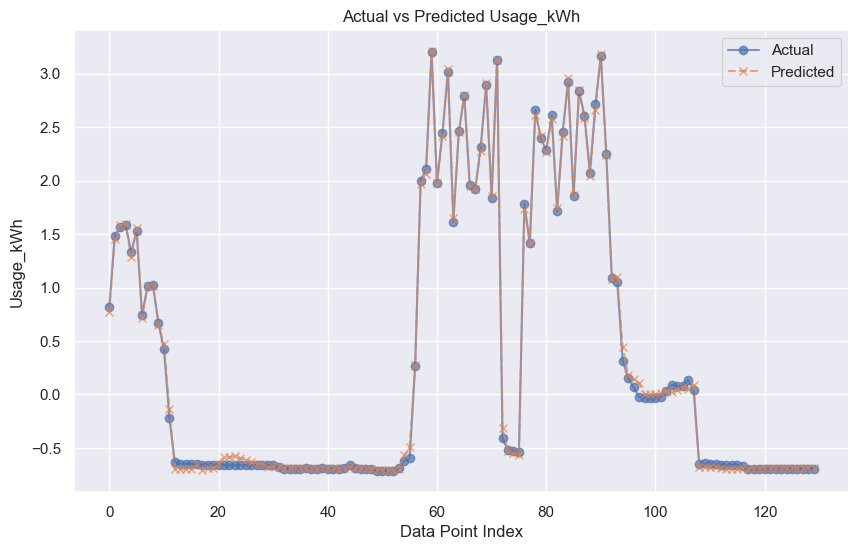

In [24]:
def plot_actual_vs_predicted(y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='Actual', marker='o', linestyle='-', alpha=0.7)
    plt.plot(y_pred, label='Predicted', marker='x', linestyle='--', alpha=0.7)
    plt.xlabel('Data Point Index')
    plt.ylabel('Usage_kWh')
    plt.legend()
    plt.title('Actual vs Predicted Usage_kWh')
    plt.show()

# Example usage
plot_actual_vs_predicted(y_test[:130].flatten(), predictions[:130].flatten())

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Select features and target
features = df.drop(columns=['Usage_kWh'])
target = df['Usage_kWh']

# Reshape for RNN input (samples, timesteps, features)
# Assuming each row is a single time step; adjust if you have sequences
X = features.values
y = target.values.reshape((-1,1))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_true = y_test

### Training GRU

In [26]:
from GRU import GRUTrainer
    
# Generate data
X = np.expand_dims(df.drop(columns=["Usage_kWh"]),axis=1).reshape(-1,1,17)
y = np.expand_dims(df["Usage_kWh"],axis=1).reshape(-1,1,1)

# Create large dataset
n_sequences = X.shape[0]
time_steps = 96
input_size = 17
hidden_size = 10
output_size = 1
batch_size = 32

# Split data
train_split = 0.7
val_split = 0.25
split1 = int(train_split * n_sequences)
split2 = int((train_split + val_split) * n_sequences)

X_train, X_val, X_test = X[:split1], X[split1:split2], X[split2:]
y_train, y_val, y_test = y[:split1], y[split1:split2], y[split2:]

# Initialize and train
trainer = GRUTrainer(input_size, hidden_size, output_size, batch_size)
trainer.train(
    X_train, y_train,
    epochs=50,
    batch_size=batch_size,
    X_val=X_val,
    y_val=y_val,
    shuffle=True
)

# Make predictions
predictions = trainer.predict(X_test, batch_size=batch_size)

Epoch 1/50
Train - Loss: 0.1780, MSE: 0.1780 MAE: 0.2340 RMSE: 0.3258
Val - Loss: 0.0153, MSE: 0.0153 MAE: 0.2340 RMSE: 0.3258
--------------------------------------------------
Epoch 2/50
Train - Loss: 0.0177, MSE: 0.0177 MAE: 0.0732 RMSE: 0.1223
Val - Loss: 0.0106, MSE: 0.0106 MAE: 0.0732 RMSE: 0.1223
--------------------------------------------------
Epoch 3/50
Train - Loss: 0.0142, MSE: 0.0142 MAE: 0.0665 RMSE: 0.1081
Val - Loss: 0.0075, MSE: 0.0075 MAE: 0.0665 RMSE: 0.1081
--------------------------------------------------
Epoch 4/50
Train - Loss: 0.0119, MSE: 0.0119 MAE: 0.0607 RMSE: 0.0981
Val - Loss: 0.0074, MSE: 0.0074 MAE: 0.0607 RMSE: 0.0981
--------------------------------------------------
Epoch 5/50
Train - Loss: 0.0096, MSE: 0.0096 MAE: 0.0534 RMSE: 0.0876
Val - Loss: 0.0048, MSE: 0.0048 MAE: 0.0534 RMSE: 0.0876
--------------------------------------------------
Epoch 6/50
Train - Loss: 0.0075, MSE: 0.0075 MAE: 0.0463 RMSE: 0.0777
Val - Loss: 0.0050, MSE: 0.0050 MAE: 0.0

In [27]:
R_square(predictions,y_test)

0.9993021123638534

Results of training
MSE: 0.0011
RMSE: 0.0301
R^2: 0.9993

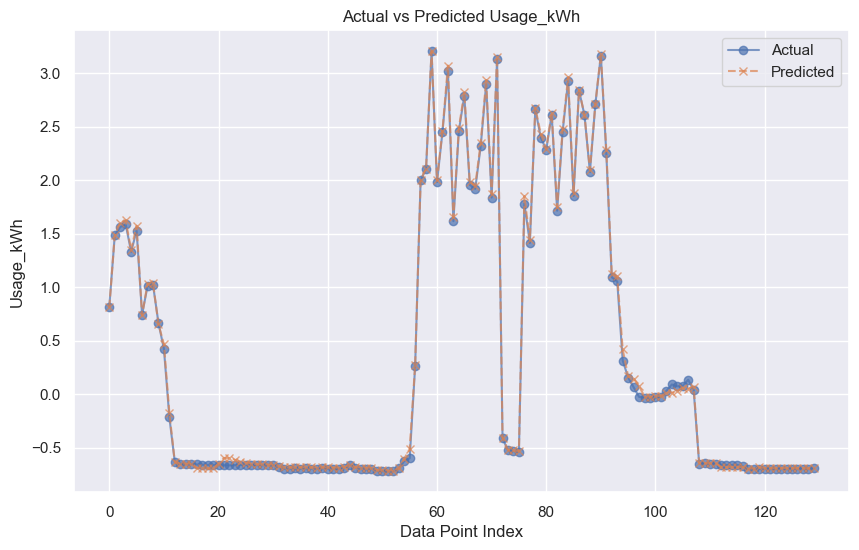

In [28]:
def plot_actual_vs_predicted(y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='Actual', marker='o', linestyle='-', alpha=0.7)
    plt.plot(y_pred, label='Predicted', marker='x', linestyle='--', alpha=0.7)
    plt.xlabel('Data Point Index')
    plt.ylabel('Usage_kWh')
    plt.legend()
    plt.title('Actual vs Predicted Usage_kWh')
    plt.show()

# Example usage
plot_actual_vs_predicted(y_test[:130].flatten(), predictions[:130].flatten())

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Select features and target
features = df.drop(columns=['Usage_kWh'])
target = df['Usage_kWh']

# Reshape for RNN input (samples, timesteps, features)
# Assuming each row is a single time step; adjust if you have sequences
X = features.values
y = target.values.reshape((-1,1))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_true = y_test

### Training LSTM

In [30]:
from LSTM import LSTMTrainer
    
# Generate data
X = np.expand_dims(df.drop(columns=["Usage_kWh"]),axis=1).reshape(-1,1,17)
y = np.expand_dims(df["Usage_kWh"],axis=1).reshape(-1,1,1)

# Create large dataset
n_sequences = X.shape[0]
time_steps = 96
input_size = 17
hidden_size = 10
output_size = 1
batch_size = 32

# Split data
train_split = 0.7
val_split = 0.25
split1 = int(train_split * n_sequences)
split2 = int((train_split + val_split) * n_sequences)

X_train, X_val, X_test = X[:split1], X[split1:split2], X[split2:]
y_train, y_val, y_test = y[:split1], y[split1:split2], y[split2:]

# Initialize and train
trainer = LSTMTrainer(input_size, hidden_size, output_size, batch_size)
trainer.train(
    X_train, y_train,
    epochs=50,
    batch_size=batch_size,
    X_val=X_val,
    y_val=y_val,
    shuffle=True
)

# Make predictions
predictions = trainer.predict(X_test, batch_size=batch_size)

Epoch 1/50
Train - Loss: 0.2033, MSE: 0.2033, MAE: 0.2586, RMSE: 0.3512
Val - Loss: 0.0168, MSE: 0.0168, MAE: 0.0787, RMSE: 0.1089
--------------------------------------------------
Epoch 2/50
Train - Loss: 0.0187, MSE: 0.0187, MAE: 0.0767, RMSE: 0.1272
Val - Loss: 0.0104, MSE: 0.0104, MAE: 0.0700, RMSE: 0.0910
--------------------------------------------------
Epoch 3/50
Train - Loss: 0.0137, MSE: 0.0137, MAE: 0.0672, RMSE: 0.1077
Val - Loss: 0.0096, MSE: 0.0096, MAE: 0.0675, RMSE: 0.0888
--------------------------------------------------
Epoch 4/50
Train - Loss: 0.0105, MSE: 0.0105, MAE: 0.0593, RMSE: 0.0942
Val - Loss: 0.0060, MSE: 0.0060, MAE: 0.0533, RMSE: 0.0702
--------------------------------------------------
Epoch 5/50
Train - Loss: 0.0079, MSE: 0.0079, MAE: 0.0500, RMSE: 0.0811
Val - Loss: 0.0040, MSE: 0.0040, MAE: 0.0428, RMSE: 0.0574
--------------------------------------------------
Epoch 6/50
Train - Loss: 0.0060, MSE: 0.0060, MAE: 0.0422, RMSE: 0.0701
Val - Loss: 0.0028

In [31]:
R_square(predictions,y_test)

0.9992418296559941

Results of training
MSE: 0.0010
RMSE: 0.0286
R^2: 0.9992

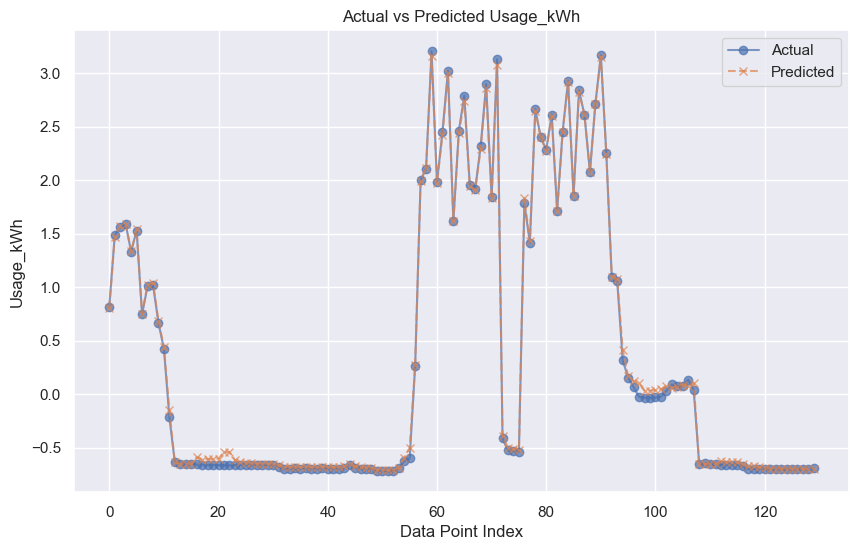

In [32]:
def plot_actual_vs_predicted(y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='Actual', marker='o', linestyle='-', alpha=0.7)
    plt.plot(y_pred, label='Predicted', marker='x', linestyle='--', alpha=0.7)
    plt.xlabel('Data Point Index')
    plt.ylabel('Usage_kWh')
    plt.legend()
    plt.title('Actual vs Predicted Usage_kWh')
    plt.show()

# Example usage
plot_actual_vs_predicted(y_test[:130].flatten(), predictions[:130].flatten())

### Conclusion

All three models were trained on the steel industry power consumption dataset. Training took place for 50 epochs for each model. We have 96 timesteps for each model.

| Results | | |
|----------|------|-------|
| RNN     | GRU | LSTM |
|MSE: 0.0018|MSE: 0.0011|MSE: 0.0010|
|RMSE: 0.0397|RMSE: 0.0301|RMSE: 0.0286|
|R^2: 0.9983|R^2: 0.9993|R^2: 0.9992|

From the results above we can conclude that LSTM performs better overall followed by GRU and RNN.